# <center> Лабораторная работа 1 (начало) (Data Structures, Indexing, Cleaning Data, Math)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(242)
### Type your code here


### Информация для последующих заданий
- Для всех последующих заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные tr_mcc_codes, tr_types, transactions и gender_train из одноимённых таблиц из папки data. Для таблицы transactions используйте только первые n=1000000 строк. Обратите внимание на разделители внутри каждого из файлов - они могут различаться!

In [3]:
# Определение путей к файлам
path_to_data = 'data/'

file_tr_mcc_codes = path_to_data + 'tr_mcc_codes.csv'
file_tr_types = path_to_data + 'tr_types.csv'
file_transactions = path_to_data + 'transactions.csv'
file_gender_train = path_to_data + 'gender_train.csv'

# Чтение данных из файлов с учетом заданных разделителей
tr_mcc_codes = pd.read_csv(file_tr_mcc_codes, sep=';') # Разделитель - точка с запятой
tr_types = pd.read_csv(file_tr_types, sep=';') # Разделитель - точка с запятой
transactions = pd.read_csv(file_transactions, sep=',', nrows=1000000) # Разделитель - запятая и limit на первые 1000000 строк
gender_train = pd.read_csv(file_gender_train, sep=',') # Разделитель - запятая



## Описание данных
### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;

#### Task 1.
1. В tr_types выберите произвольные 100 строк с помощью метода sample (указав при этом random_seed равный 242)
2. В полученной на предыдущем этапе подвыборке найдите долю наблюдений (стобец tr_description), в которой содержится подстрока 'плата' (в любом регистре). (\*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Строки "ПлатА за аренду", "ПлатАза аренду", "ПЛАТА" удовлетворяют условию, так как будучи переведёнными в нижний регистр содержат подстроку "плата".

In [4]:
# Выбор произвольных 100 строк
sample_tr_types = tr_types.sample(n=100) 

# Установим параметры отображения, чтобы увидеть все строки
pd.set_option('display.max_rows', 100)

# Вывод всех 100 строк
print("Sampled 100 rows:")
print(sample_tr_types)

# Проверка, содержит ли столбец 'tr_description' подстроку 'плата' (в любом регистре)
contains_plata = sample_tr_types['tr_description'].str.contains('плата', case=False, na=False)
proportion = contains_plata.mean()

# Округление до двух знаков после запятой
rounded_proportion = round(proportion * 100, 2)  # умножаем на 100 для процентного представления

# Вывод ответа в формате "123.45"
print(f"Содержат: 'плата': {rounded_proportion:.2f}")

Sampled 100 rows:
     tr_type                                     tr_description
37      6210                    Возврат покупки.POS Зарубеж. ТУ
50      7034  Перевод на карту/ с карты через АТМ (без взима...
145     2431  Перевод с карты на счет физ.лица в другом банк...
4       4001  Плата за получение наличных в Сбербанке (в дру...
69      8000                   Поправки по счету клиен. Зачисл.
43      7020                           Взнос наличных через POS
5       4010        Плата за получение наличных в АТМ Сбербанка
125     2351                Погашение кредита с карты через ВСП
16      4060  Плата за перевод на карту (с карты) через POS ...
120     2332  Списание с карты по операции “перевода с карты...
147     2433  Перевод с карты на счет физ.лица в другом банк...
64      7082  Перевод/пополнение со счета на карту через Инт...
92      4045                                                н/д
31      5110                            Списание % за овердрафт
48      7031  Перевод 

#### Task 2. 
1. Для поля tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Из перечисленных вариантов выберите те, которые попали в топ-5 транзакций по частоте встречаемости.

#### Выберите все верные пункты:
    - 1) Выдача наличных в АТМ Сбербанк России
    - 2) Комиссия за обслуживание ссудного счета
    - 3) Списание по требованию	
    - 4) Оплата услуги. Банкоматы СБ РФ
    - 5) Погашение кредита (в пределах одного филиала)
    - 6) Покупка. POS ТУ СБ РФ

In [5]:
# Подсчет частоты встречаемости каждого типа транзакции
tr_type_counts = transactions['tr_type'].value_counts()

# Получение топ-5 типов транзакций по частоте встречаемости
top_5_tr_types = tr_type_counts.head(5).index

# Присоединение к tr_types для получения описания каждого типа транзакции
top_5_descriptions = tr_types[tr_types['tr_type'].isin(top_5_tr_types)]

# Вывод описания транзакций, попавших в топ-5
print("Топ-5 транзакций по частоте встречаемости:")
print(top_5_descriptions)

# Перечисленные варианты для проверки
options = [
    "Выдача наличных в АТМ Сбербанк России",
    "Комиссия за обслуживание ссудного счета",
    "Списание по требованию",
    "Оплата услуги. Банкоматы СБ РФ",
    "Погашение кредита (в пределах одного филиала)",
    "Покупка. POS ТУ СБ РФ"
]

# Проверим, какие из перечисленных входят в топ-5
matched_options = [desc for desc in options if desc in top_5_descriptions['tr_description'].values]

print("Варианты, которые попали в топ-5:")
print(matched_options)

Топ-5 транзакций по частоте встречаемости:
     tr_type                                     tr_description
59      7070  Перевод на карту (с карты) через Мобильный бан...
98      1010                              Покупка. POS ТУ СБ РФ
99      1030                     Оплата услуги. Банкоматы СБ РФ
101     1110                             Покупка. POS ТУ Россия
106     2010              Выдача наличных в АТМ Сбербанк России
Варианты, которые попали в топ-5:
['Выдача наличных в АТМ Сбербанк России', 'Оплата услуги. Банкоматы СБ РФ', 'Покупка. POS ТУ СБ РФ']


#### Task 3.
1. В датафрейме transactions задайте столбец  customer_id в качестве индекса.
2. Выделите клиента с максимальной суммой транзакции (то есть с максимальным приходом на карту). (\*)
3. Найдите у него наиболее часто встречающийся модуль суммы приходов/расходов. (\**)


#### Выберите все верные пункты:
    - 1) 1122957.89
    - 2) 15721.41
    - 3) 22459.16
    - 4) 13475494.63
    - 5) 107407.78
    - 6) 65019.26

##### Пояснения:
(\*) Если у клиента были транзакции [-10000, 10, 0, -10], то максимумом будет являться значение 10. <br>
(\**) Если у клиента были транзакции [-10000, 10, 0, -10], то наиболее встречающийся модуль суммы транзакций равен 10, и встретился он 2 раза.

In [6]:
# Задаём столбец customer_id в качестве индекса
transactions.set_index('customer_id', inplace=True)

# Находим клиента с максимальным приходом (положительная транзакция)
max_amount_customer_id = transactions['amount'].idxmax()
max_transaction = transactions.loc[max_amount_customer_id]

print(f"Клиент с максимальным приходом: {max_amount_customer_id}")
print(f"Максимальный приход: {max_transaction['amount']}")

# Выбираем все транзакции этого клиента
customer_transactions = transactions.loc[max_amount_customer_id]

# Вычисляем модуль всех сумм приходов/расходов
absolute_amounts = customer_transactions['amount'].abs()

# Находим наиболее часто встречающийся модуль суммы
most_frequent_module = absolute_amounts.value_counts().idxmax()

print(f"Наиболее часто встречающийся модуль суммы: {most_frequent_module}")

# Сравниваем с данными в вопросе
options = [
    1122957.89,
    15721.41,
    22459.16,
    13475494.63,
    107407.78,
    65019.26
]

# Проверим, какие из вариантов присутствуют в наиболее частом модуле суммы
matched_options = [option for option in options if option == most_frequent_module]

print("Наиболее часто встречающийся модуль, попавший в варианты:")
print(matched_options)

Клиент с максимальным приходом: 26782922
Максимальный приход: customer_id
26782922    -31442.82
26782922    -11935.25
26782922    -11229.58
26782922    -67377.47
26782922   -129913.87
              ...    
26782922    988202.94
26782922    -80852.97
26782922    -22459.16
26782922    -10488.43
26782922    116787.62
Name: amount, Length: 294, dtype: float64
Наиболее часто встречающийся модуль суммы: 22459.16
Наиболее часто встречающийся модуль, попавший в варианты:
[22459.16]


In [18]:
print(matched_options[0])

22459.16


#### Task 4.
1. Найдите максимальную разницу между медианами суммы транзакций, посчитанными при заданных ниже условиях по полю amount из таблицы transactions (\*):
    - Медиана суммы транзакций
    - Медиана суммы транзакций по тем строкам, которые ни в одном из своих столбцов не содержат пустые значения
    - Медиана суммы транзакций по строкам, отсортированным по полю amount в порядке возрастания, и из которых удалены дублирующиеся по столбцам [mcc_code, tr_type] строки, причём при удалении соответстующих дублей остаются только последние из дублирующихся строк (keep='last')

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Для вычисления максимальной разницы между значениями списка можно использовать функцию np.ptp  
(\**) Если в результате получились значения [1,3,5], то макимальная разница между ними 4 == 5-1.

In [7]:
# Медиана суммы транзакций без дополнительных условий
median_all = transactions['amount'].median()

# Медиана суммы транзакций по строкам без пустых значений
median_no_na = transactions.dropna().loc[:, 'amount'].median()

# Медиана суммы транзакций после сортировки и удаления дублей
# Сортируем по полю amount
sorted_transactions = transactions.sort_values(by='amount')
# Удаляем дубли по [mcc_code, tr_type], оставляя последние
unique_sorted_transactions = sorted_transactions.drop_duplicates(subset=['mcc_code', 'tr_type'], keep='last')
# Рассчитываем медиану
median_sorted_unique = unique_sorted_transactions['amount'].median()

# Рассчитать максимальную разницу между медианами
medians = [median_all, median_no_na, median_sorted_unique]
max_diff = np.ptp(medians)  # ptp = peak to peak (размах), вычисляет разницу max - min

# Округление и вывод
rounded_max_diff = round(max_diff, 2)
print(f"Максимальная разница между медианами: {rounded_max_diff:.2f}")

Максимальная разница между медианами: 4693.96


#### Task 5.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки


In [8]:
# Определение путей к файлам
path_to_data = 'data/'

file_tr_mcc_codes = path_to_data + 'tr_mcc_codes.csv'
file_tr_types = path_to_data + 'tr_types.csv'
file_transactions = path_to_data + 'transactions.csv'
file_gender_train = path_to_data + 'gender_train.csv'

# Чтение данных из файлов с учетом заданных разделителей
tr_mcc_codes = pd.read_csv(file_tr_mcc_codes, sep=';') # Разделитель - точка с запятой
tr_types = pd.read_csv(file_tr_types, sep=';') # Разделитель - точка с запятой
transactions = pd.read_csv(file_transactions, sep=',', nrows=1000000) # Разделитель - запятая и limit на первые 1000000 строк
customers_gender_train = pd.read_csv(file_gender_train, sep=',') # Разделитель - запятая

In [9]:
# Соединение таблиц transactions и tr_mcc_codes
transactions = pd.merge(transactions, tr_mcc_codes, on='mcc_code', how='inner')

# Соединение таблиц transactions и tr_types
transactions = pd.merge(transactions, tr_types, on='tr_type', how='inner')

# Соединение таблиц transactions и customers_gender_train
transactions = pd.merge(transactions, customers_gender_train, on='customer_id', how='left')

# Проверка количества строк в объединенной таблице
print(transactions.shape[0])

999584


#### Task 6.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Представьте ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [10]:
# Фильтрация транзакций, чтобы оставить только траты (отрицательные amount)
expenses = transactions[transactions['amount'] < 0]

# Разделение по полу
# Здесь предполагается, что column 'gender' определяет пол (например, 0 - мужчины, 1 - женщины)
women_expenses = expenses[expenses['gender'] == 1]['amount']
men_expenses = expenses[expenses['gender'] == 0]['amount']

#  Вычисление средних трат
mean_women_expense = women_expenses.mean()
mean_men_expense = men_expenses.mean()

#  Вычисление модуля разницы
difference = abs(mean_women_expense - mean_men_expense)

#  Округляем до двух знаков после запятой
rounded_difference = round(difference, 2)

# Выводим результат
print(f"{rounded_difference:.2f}")

32718.05


#### Task 7:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [12]:
# Создаем новый столбец mcc_code+tr_type
transactions['mcc_code+tr_type'] = transactions['mcc_code'].astype(str) + transactions['tr_type'].astype(str)

# Оставляем только те записи, где amount отрицательное (траты)
expenses = transactions[transactions['amount'] < 0]

#  Группируем данные по новому столбцу и вычисляем количество и дисперсию
grouped = expenses.groupby('mcc_code+tr_type').agg(
    count=('amount', 'size'),
    variance=('amount', 'var')
)

#Фильтруем группы, имеющие количество >= 10
filtered = grouped[grouped['count'] >= 10]

# Определяем отношения максимальной и минимальной дисперсии
max_variance = filtered['variance'].max()
min_variance = filtered['variance'].min()
ratio = max_variance / min_variance

# Округляем результат до ближайшего целого и выводим
rounded_ratio = round(ratio)

print(f"{rounded_ratio}")

9170599


#### Task 8:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [13]:
# Фильтрация положительных транзакций (приход)
income_transactions = transactions[transactions['amount'] > 0]

# Группировка по полу и типу транзакции, вычисление максимального прихода
max_income_by_type = income_transactions.groupby(['gender', 'tr_type','tr_description']).agg(
    max_income=('amount', 'max')
).reset_index()

# Выбор 5 минимальных "max_income" отдельно для мужчин и женщин
min_male_income = max_income_by_type[max_income_by_type['gender'] == 0].nlargest(5, 'max_income', keep='all')
min_female_income = max_income_by_type[max_income_by_type['gender'] == 1].nlargest(5, 'max_income', keep='all')

# Находите пересечения транзакций среди мужчин и женщин
# Объединение результатов и фильтрация только по интересующим типам транзакций
relevant_descriptions = [
    "Покупка. POS ТУ СБ РФ",
    "Списание после проведения претензионной работы",
    "Плата за получение наличных. Россия",
    "Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте",
    "Плата за получение наличных в АТМ. Россия",
    "Наличные. Зарубеж. банк",
    "Возврат покупки. POS ТУ Россия"
    #,"Взнос наличных через POS"
]

# Для удобства агрегируем метки по интересующимся типам транзакций
combined_min_income = pd.concat([min_male_income, min_female_income])
common_transactions = combined_min_income[combined_min_income['tr_description'].isin(relevant_descriptions)]

print(common_transactions)

Empty DataFrame
Columns: [gender, tr_type, tr_description, max_income]
Index: []


#### Task 9:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [15]:
df = transactions[['mcc_description', 'mcc_code']].copy()

# Получение уникальных пар "код-категория"
unique_categories = df.drop_duplicates(subset=['mcc_description', 'mcc_code'])

pd.set_option('display.max_rows', 100)
categories = [
    5813, 5768,3454,6673,2224,8779
]
print(unique_categories[unique_categories['mcc_code'].isin(categories)])
#print(unique_categories)

sample_tr_types = unique_categories.sample(n=100) 
print(sample_tr_types)

                                        mcc_description  mcc_code
1112  Бары, коктейль-бары, дискотеки, ночные клубы и...      5813
                                          mcc_description  mcc_code
1966                   Различные товары общего назначения      5399
76235       Магазины художественных и ремесленных изделий      5970
35723                         Принадлежности для видеоигр      7993
1902    Легковой и грузовой транспорт — продажа, серви...      5511
1108                                Магазины спорттоваров      5941
42367   Канцелярия, офисные сопутствующие товары, бума...      5111
16       Финансовые институты — снятие наличности вручную      6010
24622   Товары длительного пользования — нигде более н...      5099
908651  Судовые выплаты, включая алименты и детскую по...      9211
7                                         Товары для дома      5200
5220    Не-финансовые институты — иностранная валюта, ...      6051
11916       Ремонт бытовой техники, ремонт электропр

In [16]:
# Список интересующих нас описаний категорий
categories = [
    "Флористика",  
    "Ценные бумаги: брокеры/дилеры",
    "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков"
]

# Фильтрация датафрейма по интересующим категориям
mcc_codes_for_categories = transactions[transactions['mcc_description'].isin(categories)]['mcc_code'].unique()

# Вывод уникальных MCC кодов
print("Уникальные MCC коды для категорий:")
print(mcc_codes_for_categories)

Уникальные MCC коды для категорий:
[5813 5992 6211]


In [17]:
# 1. Извлечение трек-дня
transactions['tr_day'] = transactions['tr_datetime'].str.split(' ').str[0]

# 2. Фильтрация транзакций по критерию уникальных MCC кодов в день
mcc_per_day = transactions.groupby('tr_day')['mcc_code'].nunique()
valid_days = mcc_per_day[mcc_per_day > 75].index

filtered_transactions = transactions[transactions['tr_day'].isin(valid_days)]

# 3. Группировка данных по MCC и gender
grouped_transactions = filtered_transactions.groupby(['mcc_code', 'gender'])

# Анализ медиан для различных категорий
floristics_mcc = 5992  # код для "Флористика"
securities_mcc = 6211  #  код для "Ценные бумаги"
bars_mcc = 5813       #  код для "Бары..."


# Функция для расчета абсолютных медиан
def get_median_abs_difference(df, mcc_code):
    medians = df[df['mcc_code'] == mcc_code].groupby('gender')['amount'].median().abs()
    return medians

floristics_median = get_median_abs_difference(filtered_transactions, floristics_mcc)
securities_median = get_median_abs_difference(filtered_transactions, securities_mcc)
bars_median = get_median_abs_difference(filtered_transactions, bars_mcc)

# Печатаем или анализируем результаты
print("Floristics median difference:", floristics_median)
print("Securities median difference:", securities_median)
print("Bars median difference:", bars_median)

Floristics median difference: gender
0.0    13890.99
1.0    18865.69
Name: amount, dtype: float64
Securities median difference: gender
0.0     6737.75
1.0    11229.58
Name: amount, dtype: float64
Bars median difference: gender
0.0     9387.93
1.0    13475.49
Name: amount, dtype: float64


In [18]:
tkans_mcc = 5949
kosmetic_mcc = 5977
azart_mcc = 7995
avto_mcc = 5532

tkans_median = get_median_abs_difference(filtered_transactions, tkans_mcc)
kosmetic_median = get_median_abs_difference(filtered_transactions, kosmetic_mcc)
azart_median = get_median_abs_difference(filtered_transactions, azart_mcc)
avto_median = get_median_abs_difference(filtered_transactions, avto_mcc)

print("tkans median difference:", tkans_median)
print("kosmetic median difference:", kosmetic_median)
print("azart median difference:", azart_median)
print("avto median difference:", avto_median)

tkans median difference: gender
0.0     7344.145
1.0    15698.950
Name: amount, dtype: float64
kosmetic median difference: gender
0.0    14766.90
1.0    19494.55
Name: amount, dtype: float64
azart median difference: gender
0.0     2268.375
1.0    19988.650
Name: amount, dtype: float64
avto median difference: gender
0.0    197640.59
1.0     65580.74
Name: amount, dtype: float64


Судя по спецефичным категориям 0 - мужчины, 1 - женщины
И получается верны утверждения: BD

#### Task 10:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [19]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 5})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

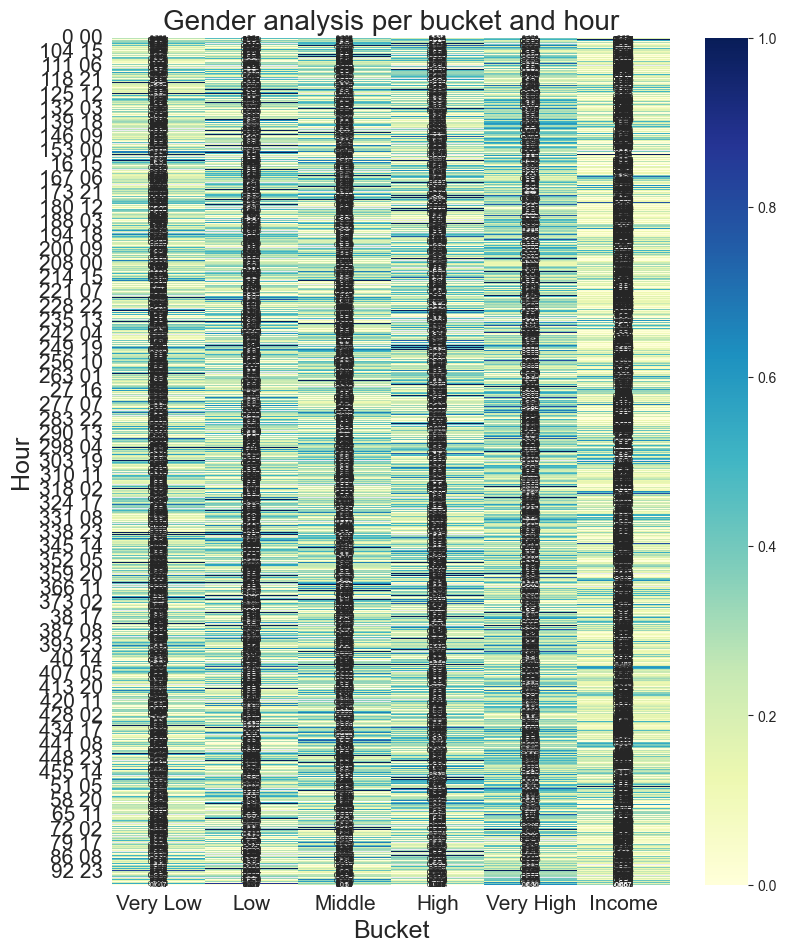

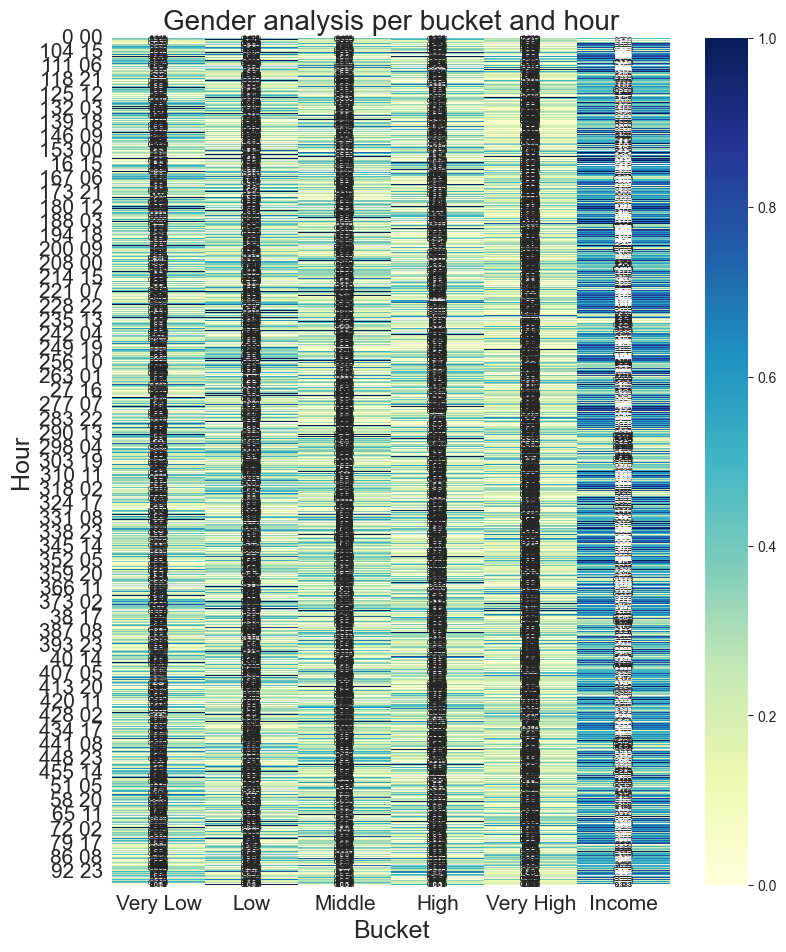

In [20]:
labels = ['Very Low', 'Low', 'Middle', 'High', 'Very High']
transactions['amount_bucket'] = pd.qcut(transactions[transactions['amount'] < 0]['amount'], q=5, labels=labels)
transactions['amount_bucket'] = transactions['amount_bucket'].cat.add_categories('Income')
transactions.loc[transactions['amount'] >= 0, 'amount_bucket'] = 'Income'
transactions['tr_hour'] = transactions['tr_datetime'].str.split(':').str[0]
pivot_table_0 = pd.pivot_table(
    transactions, 
    values='gender', 
    index='tr_hour', 
    columns='amount_bucket', 
    aggfunc=lambda x: (x == 0).mean(),
    observed=False
)
pivot_table_1 = pd.pivot_table(
    transactions, 
    values='gender', 
    index='tr_hour', 
    columns='amount_bucket', 
    aggfunc=lambda x: (x == 1).mean(),
    observed=False
)

plot_pivot_table(pivot_table_0)
plot_pivot_table(pivot_table_1)
     

#### Task 11:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

['Звонки с использованием телефонов, считывающих магнитную ленту'
 'Финансовые институты — снятие наличности автоматически'
 'Денежные переводы' 'Финансовые институты — снятие наличности вручную'
 'Бакалейные магазины, супермаркеты']
[4814 6011 4829 6010 5411]


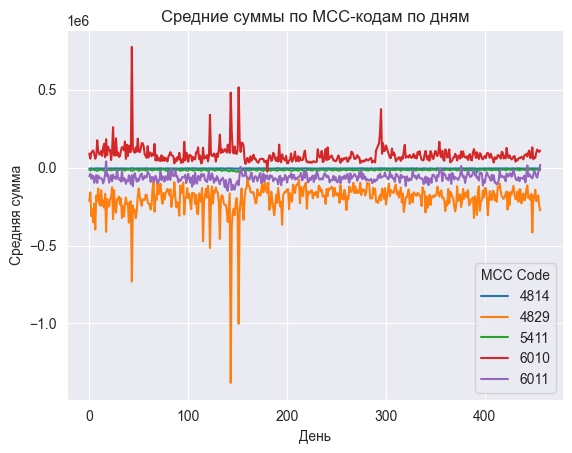

In [21]:
# Type your code here
# Изменение типа tr_day на int
transactions['tr_day'] = transactions['tr_day'].astype(int)


### Выбор MCC-кодов, которые встречаются более 60000 раз



# Рассчитаем количество вхождений каждого MCC-кода
mcc_counts = transactions['mcc_code'].value_counts()

# Отфильтруем коды, которые встречаются более 60000 раз
frequent_mcc_codes = mcc_counts[mcc_counts > 60000].index


### Группировка по дню и MCC-коду для получения среднего значения суммы

# Фильтруем датафрейм по частыми MCC-кодами
filtered_transactions = transactions[transactions['mcc_code'].isin(frequent_mcc_codes)]

# Группируем по дню и MCC-коду, вычисляем среднюю сумму
grouped = filtered_transactions.groupby(['tr_day', 'mcc_code'])['amount'].mean().unstack()


### Визуализация средних трат



print(transactions[transactions['mcc_code'].isin(frequent_mcc_codes)]['mcc_description'].unique())
print(transactions[transactions['mcc_code'].isin(frequent_mcc_codes)]['mcc_code'].unique())
# Построим графики средних значений
grouped.plot()
plt.title('Средние суммы по MCC-кодам по дням')
plt.xlabel('День')
plt.ylabel('Средняя сумма')
plt.legend(title='MCC Code')
plt.show()

Верные утверждения: 1234